# Simon's Algorithm with Qiskit

In [1]:
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram

In [2]:
# Set our secret string to ‘10’
s = '10'

# Creating registers
# Set the input qubit register size equal to the length of s
input_qubits = len(str(s))
# Set the total qubits equal to twice the size of input qubits
total_qubits = 2*input_qubits

# Create the quantum circuit
qc = QuantumCircuit(total_qubits,input_qubits)

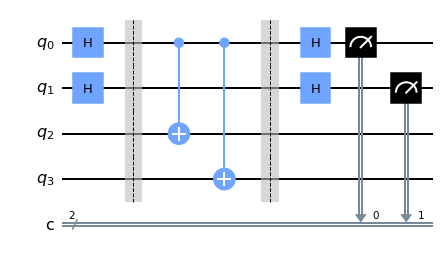

In [3]:
# Apply Hadamard gates before querying the oracle
qc.h(range(input_qubits)) 
qc.barrier()

# Create the oracle function of our secret string 
# Since we are only setting the first qubit to be 1, 
# we will only apply cx gates to the first qubit. 
for idx in range(input_qubits):
    if(s[idx] == '1'):
        for count in range(input_qubits):
            qc.cx(idx, input_qubits + count)

qc.barrier()

# Apply Hadamard gates to the input register
qc.h(range(len(str(s))))

# Measure ancilla qubits
qc.measure([0,1],[0,1])

qc.draw('mpl')

Counts:  {'00': 513, '01': 487}


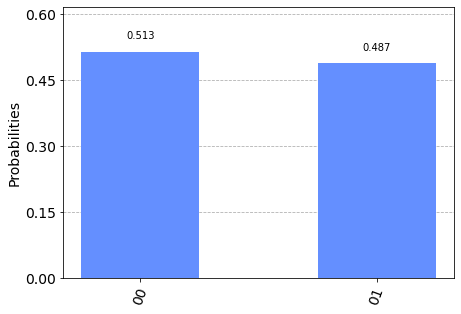

In [4]:
# Execute the quantum circuit on the simulator
backend = Aer.get_backend('qasm_simulator')
shots = 1000
results = execute(qc, backend=backend, shots=shots).result()
counts = results.get_counts(qc)

# Print results
print('Counts: ', counts)

# Plot Histogram of Probabilities
plot_histogram(counts)

As we can see in the preceding graph, we have two input register results - **00** and **01**- for our secret string (s=10). String values are reversed in Qiskit, so **01** is actaully '10', our secret string. If we had only '00' as the result then this would have meant that f is a one-to-one function. This would have been possible if s='00'. Since we have s='10' so we know that f is a two-to-one function. 

## Unitary Matrix for the Oracle Function of our Secret String s=10

In [5]:
#Changing the simulator 
backend = Aer.get_backend('unitary_simulator')

# Set our secret string to ‘10’
shh = '10'

# Creating registers
# Set the input qubit register size equal to the length of s
input_qubits = len(str(shh))
# Set the total qubits equal to twice the size of input qubits
total_qubits = 2*input_qubits

# Create the quantum circuit
unitary = QuantumCircuit(total_qubits)

#The circuit without measurement
for idx in range(input_qubits):
    if(shh[idx] == '1'):
        for count in range(input_qubits):
            unitary.cx(idx, input_qubits + count)

#job execution and getting the result as an object
job = execute(unitary, backend)
result = job.result()

#get the unitary matrix from the result object
print(result.get_unitary(unitary, decimals=3))

[[1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
  0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
  0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
  0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
  0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
  0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j
  0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j
  0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
  0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j

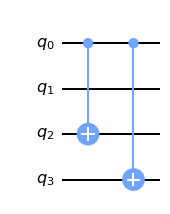

In [6]:
unitary.draw('mpl')

## Obtaining state of the quantum circuit at a particular instant

In [7]:
# Set our secret string to ‘011’
shh = '10'

# Creating registers
# Set the input qubit register size equal to the length of s
input_qubits = len(str(shh))
# Set the total qubits equal to twice the size of input qubits
total_qubits = 2*input_qubits

# Create the quantum circuit
qc = QuantumCircuit(total_qubits, total_qubits)


# Apply Hadamard gates before querying the oracle
qc.h(range(input_qubits)) 
qc.barrier()

# Create the oracle function of our secret string 
# Since we are only setting the first qubit to be 1, 
# we will only apply cx gates to the first qubit. 
for idx in range(input_qubits):
    if(shh[idx] == '1'):
        for count in range(input_qubits):
            qc.cx(idx, input_qubits + count)

qc.barrier()



# To get the eigenvector you should use the statevector simulator in the core of the circuit (without measurements)
backend = Aer.get_backend('statevector_simulator')

# Execute the circuit
result = execute(qc, backend).result().get_statevector(qc, decimals=3)

# Printing the state after Z gate
print("\nQuantum state is:",result)


Quantum state is: [0.5+0.j 0. +0.j 0.5+0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j
 0. +0.j 0. +0.j 0. +0.j 0. +0.j 0.5+0.j 0. +0.j 0.5+0.j]
